In [127]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Conv1D, InputLayer, SimpleRNN
from sklearn.preprocessing import MinMaxScaler
import sys 
sys.path.append(r'C:\Users\R.Yeshasvin\IITM2023PYTHON\PYTHON PROJECTS\New folder\src')

from utils import make_dataset, preprocess_data



In [3]:
df = pd.read_pickle('../data/processed/walmart.pkl')

In [278]:
store_34, train_data, test_data = make_dataset(df, store_number=34, train_size=0.8, return_train_test=True)


In [279]:
#train = store_34.iloc[:110][['Weekly_Sales']]
#test = store_34.iloc[110:][['Weekly_Sales']]

train_data = np.array(train_data).reshape(-1,1)
test_data = np.array(test_data).reshape(-1,1)

scaler = MinMaxScaler(feature_range=(0,1))

#scaler.fit(train)  

train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)

In [280]:
x_train, y_train = preprocess_data(train_data, 6)
x_test, y_test = preprocess_data(test_data,6)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape) 

(107, 6)
(22, 6)
(107, 1)
(22, 1)


In [281]:
model = Sequential()

model.add(LSTM(32,return_sequences=True, input_shape=(6,1)))
model.add(LSTM(16))

model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mean_squared_error')



c:\Users\R.Yeshasvin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [282]:
model.summary()

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_19 (LSTM)                  │ (None, 6, 32)          │         4,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_20 (LSTM)                  │ (None, 16)             │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 64)             │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

In [283]:
model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=150)

Epoch 1/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step - loss: 0.0526 - val_loss: 0.0222
Epoch 2/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0433 - val_loss: 0.0148
Epoch 3/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0353 - val_loss: 0.0079
Epoch 4/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0322 - val_loss: 0.0030
Epoch 5/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0198 - val_loss: 0.0014
Epoch 6/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0253 - val_loss: 0.0023
Epoch 7/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0214 - val_loss: 0.0022
Epoch 8/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0230 - val_loss: 0.0015
Epoch 9/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0279 - val_loss: 0.0014
Epoch 10/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0180 - val_loss: 0.0017
Epoch 11/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0261 - val_loss: 0.0015
Epoch 12/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0281 - val_l

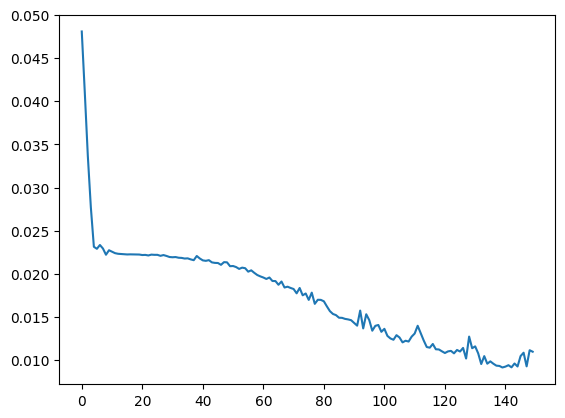

In [284]:
loss = model.history.history['loss']
plt.plot(range(len(loss)), loss)
plt.show()

In [285]:
train_preds = model.predict(x_train)
test_preds = model.predict(x_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


In [286]:
train_preds = scaler.inverse_transform(train_preds)
test_preds = scaler.inverse_transform(test_preds)

In [287]:
y_train = scaler.inverse_transform(y_train.reshape(-1,1))
y_test = scaler.inverse_transform(y_test.reshape(-1,1))

In [101]:
#-----------------------------------------------------------------------------------------
# Post processing the predicted data
#----------------------------------------------------------------------------------------

# inverse transform the train preds and test preds 
# inverse transform y train and y test and reshape it to (-1,1)
# follow it up with plotting and error prediction 

In [288]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score
import math

print('RMSE: ', math.sqrt(mean_squared_error(y_train, train_preds)))
print('MAPE: ', mean_absolute_percentage_error(y_train, train_preds))
print('R2 score: ', r2_score(y_train, train_preds))

RMSE:  72457.4256524235
MAPE:  0.0463830034767642
R2 score:  0.6273588980070072


In [289]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score
import math

print('RMSE: ', math.sqrt(mean_squared_error(y_test, test_preds)))
print('MAPE: ', mean_absolute_percentage_error(y_test, test_preds))
print('R2 score: ', r2_score(y_test, test_preds))

RMSE:  31453.304422461988
MAPE:  0.0248304811622611
R2 score:  -0.14600276275638713


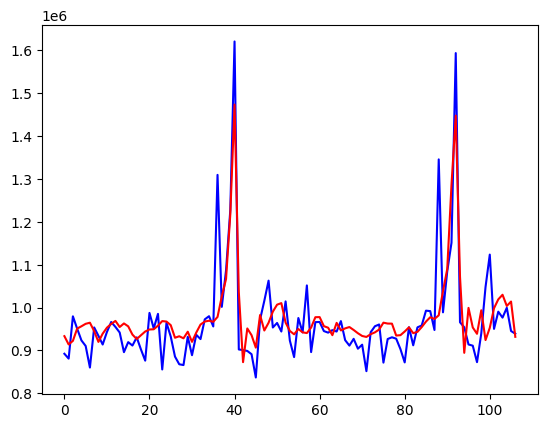

In [290]:
plt.plot(y_train, color='blue')
plt.plot(train_preds, color='red')  

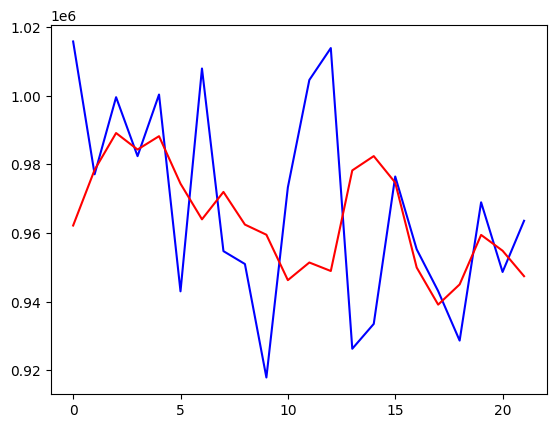

In [291]:
plt.plot(y_test, color='blue')
plt.plot(test_preds, color='red')

CNN MODEL 

In [33]:
df = pd.read_pickle('../data/processed/walmart.pkl')

In [315]:
store_34, train_data, test_data = make_dataset(df, store_number=34, train_size=0.8, return_train_test=True)

In [316]:
train_data = np.array(train_data).reshape(-1,1)

test_data = np.array(test_data).reshape(-1,1)


print(train_data.shape)
print(test_data.shape)

train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)


#training_size = int(len(df1)*0.75)
#testing_size = len(df1)-training_size

#train_data, test_data = df1[0:training_size,:], df1[training_size:len(df1),:1]

(114, 1)
(29, 1)


In [318]:
x_train, y_train = preprocess_data(train_data, time_step=8)
x_test, y_test = preprocess_data(test_data, time_step=8)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape) 

(105, 8)
(20, 8)
(105, 1)
(20, 1)


In [319]:
model = Sequential()

#model.add(Conv1D(filters=16, kernel_size=2, activation='relu', input_shape=(12,1)))

model.add(InputLayer(shape=(8,1)))

#model.add(LSTM(100, return_sequences=True))
model.add(LSTM(32))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='linear'))


In [320]:
model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()


Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_23 (LSTM)                  │ (None, 32)             │         4,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 128)            │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,897 (66.00 KB)

 Trainable params: 16,897 (66.00 KB)

 Non-trainable params: 0 (0.00 B)

In [321]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=150)

Epoch 1/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - loss: 0.0527 - val_loss: 0.0116
Epoch 2/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0209 - val_loss: 0.0033
Epoch 3/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0216 - val_loss: 0.0017
Epoch 4/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0196 - val_loss: 0.0040
Epoch 5/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0253 - val_loss: 0.0037
Epoch 6/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0216 - val_loss: 0.0015
Epoch 7/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0227 - val_loss: 0.0014
Epoch 8/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0250 - val_loss: 0.0016
Epoch 9/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0212 - val_loss: 0.0016
Epoch 10/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0237 - val_loss: 0.0014
Epoch 11/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0170 - val_loss: 0.0013
Epoch 12/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0208 - val_lo

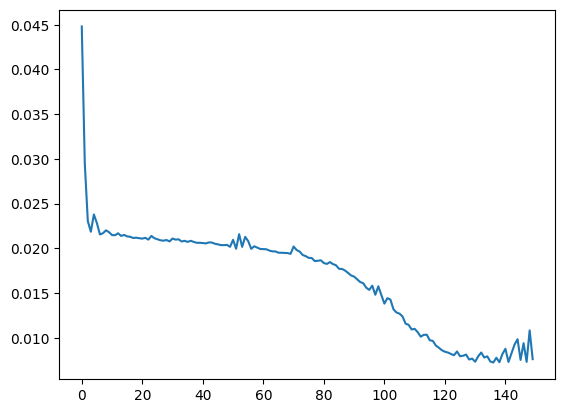

In [322]:
plt.plot(model.history.history['loss'])

In [323]:
train_preds = model.predict(x_train)
test_preds = model.predict(x_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


In [324]:
train_preds = scaler.inverse_transform(train_preds).reshape(-1,1)
test_preds = scaler.inverse_transform(test_preds).reshape(-1,1)

In [325]:
y_train_scaled = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

In [326]:
print('RMSE: ', math.sqrt(mean_squared_error(y_train_scaled, train_preds)))
print('MAPE: ', mean_absolute_percentage_error(y_train_scaled, train_preds))
print('R2 score: ', r2_score(y_train, train_preds))

RMSE:  66679.35968343215
MAPE:  0.0414408545062042
R2 score:  -41452573983174.234


In [327]:
print('RMSE: ', math.sqrt(mean_squared_error(y_test_scaled, test_preds)))
print('MAPE: ', mean_absolute_percentage_error(y_test_scaled, test_preds))
print('R2 score: ', r2_score(y_test, test_preds))

RMSE:  32340.965239570007
MAPE:  0.02798036658027418
R2 score:  -698395664033374.5


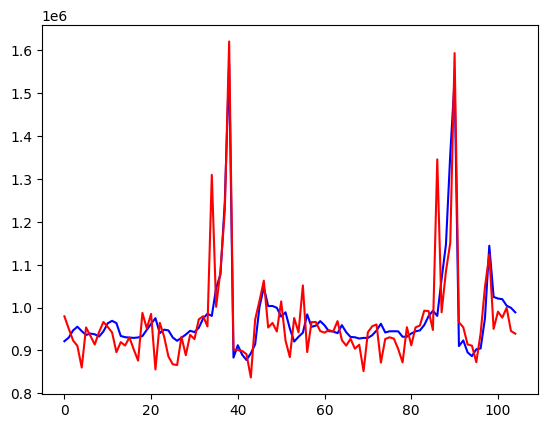

In [328]:
plt.plot(train_preds, color='blue')
plt.plot(y_train_scaled, color='red')

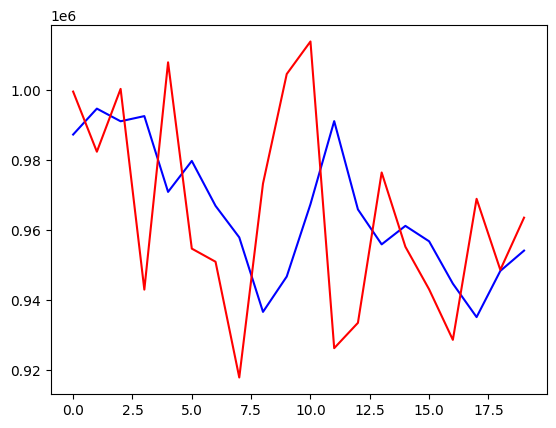

In [329]:
plt.plot(test_preds, color='blue')
plt.plot(y_test_scaled, color='red')

SIMPLE RNN MODEL 


In [251]:
store, train, test = make_dataset(df, store_number=34, train_size=0.8, return_train_test=True)

In [252]:
train_data = np.array(train).reshape(-1,1)
test_data = np.array(test).reshape(-1,1)

scaler = MinMaxScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)

In [253]:
x_train, y_train = preprocess_data(train_data, time_step=6)
x_test, y_test = preprocess_data(test_data, time_step=6)

In [254]:
model = Sequential()

model.add(SimpleRNN(32, activation='relu', input_shape=(6,1)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

c:\Users\R.Yeshasvin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [255]:
model.compile(optimizer='adam', loss= 'mean_squared_error')
model.summary()

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_11 (SimpleRNN)       │ (None, 32)             │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,177 (8.50 KB)

 Trainable params: 2,177 (8.50 KB)

 Non-trainable params: 0 (0.00 B)

In [256]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=150)

Epoch 1/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - loss: 0.0332 - val_loss: 0.0074
Epoch 2/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0199 - val_loss: 0.0020
Epoch 3/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0251 - val_loss: 0.0015
Epoch 4/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0270 - val_loss: 0.0017
Epoch 5/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0174 - val_loss: 0.0016
Epoch 6/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0219 - val_loss: 0.0014
Epoch 7/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0280 - val_loss: 0.0015
Epoch 8/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0226 - val_loss: 0.0018
Epoch 9/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0205 - val_loss: 0.0019
Epoch 10/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0183 - val_loss: 0.0016
Epoch 11/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0207 - val_loss: 0.0014
Epoch 12/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0176 - val_los

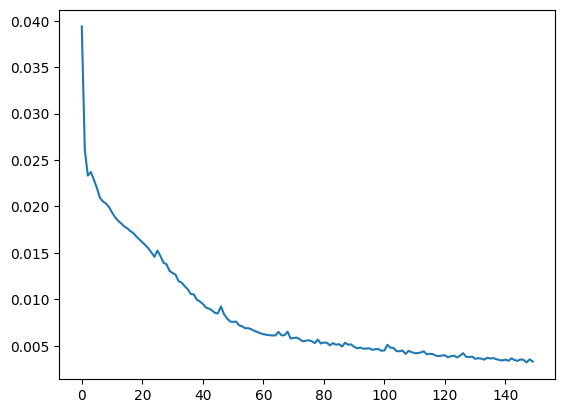

In [258]:
plt.plot(model.history.history['loss'])

In [259]:
train_preds = model.predict(x_train)
test_preds = model.predict(x_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


In [260]:
train_preds = scaler.inverse_transform(train_preds).reshape(-1,1)
test_preds = scaler.inverse_transform(test_preds).reshape(-1,1)

y_train = scaler.inverse_transform(y_train).reshape(-1,1)
y_test = scaler.inverse_transform(y_test).reshape(-1,1)

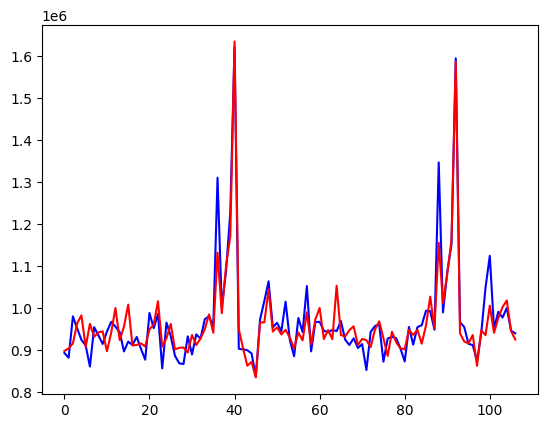

In [261]:
plt.plot(y_train, color='blue')
plt.plot(train_preds, color='red')

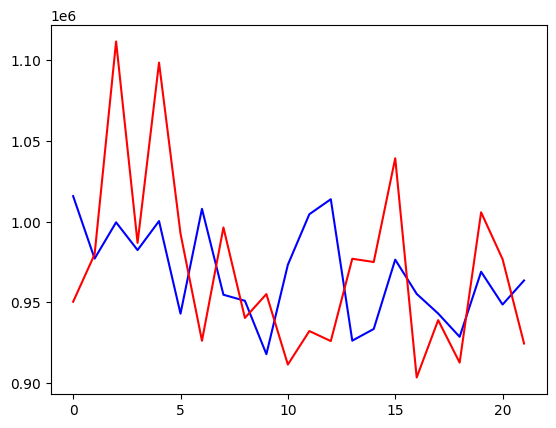

In [262]:
plt.plot(y_test, color='blue')
plt.plot(test_preds, color='red')

In [263]:
print('RMSE: ', math.sqrt(mean_squared_error(y_train, train_preds)))
print('MAPE: ', mean_absolute_percentage_error(y_train, train_preds))
print('R2 score: ', r2_score(y_train, train_preds))

RMSE:  44295.42077337305
MAPE:  0.03067222167737374
R2 score:  0.8607347962836395


In [264]:
print('RMSE: ', math.sqrt(mean_squared_error(y_test, test_preds)))
print('MAPE: ', mean_absolute_percentage_error(y_test, test_preds))
print('R2 score: ', r2_score(y_test, test_preds))

RMSE:  56590.593479005176
MAPE:  0.04910007484067425
R2 score:  -2.7097240453977935


MIXED MODEL

In [352]:
store, train, test = make_dataset(df, store_number=34, train_size=0.8, return_train_test=True)

In [353]:
train_data = np.array(train).reshape(-1,1)
test_data = np.array(test).reshape(-1,1)

scaler = MinMaxScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)

In [354]:
x_train, y_train = preprocess_data(train_data, time_step=6)
x_test, y_test = preprocess_data(test_data, time_step=6)

In [355]:
model = Sequential()


model.add(SimpleRNN(32, activation='relu', return_sequences=True, input_shape=(6, 1)))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))


model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()

c:\Users\R.Yeshasvin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_14 (SimpleRNN)       │ (None, 6, 32)          │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_25 (LSTM)                  │ (None, 32)             │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_58 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,497 (41.00 KB)

 Trainable params: 10,497 (41.00 KB)

 Non-trainable params: 0 (0.00 B)

In [356]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=150)

Epoch 1/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - loss: 0.0406 - val_loss: 0.0140
Epoch 2/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0334 - val_loss: 0.0064
Epoch 3/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0290 - val_loss: 0.0020
Epoch 4/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0254 - val_loss: 0.0015
Epoch 5/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0195 - val_loss: 0.0016
Epoch 6/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0209 - val_loss: 0.0016
Epoch 7/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0236 - val_loss: 0.0015
Epoch 8/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0179 - val_loss: 0.0014
Epoch 9/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0149 - val_loss: 0.0015
Epoch 10/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0147 - val_loss: 0.0014
Epoch 11/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0201 - val_loss: 0.0016
Epoch 12/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0240 - val_lo

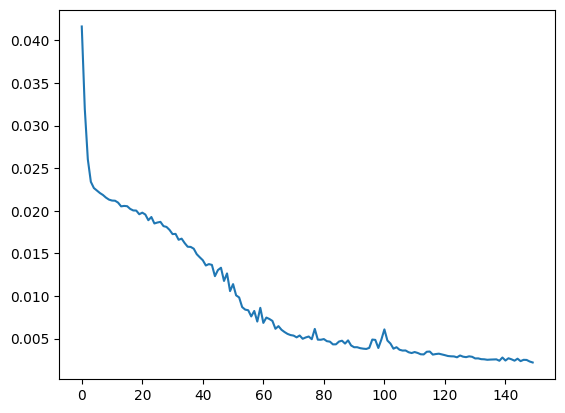

In [357]:
plt.plot(model.history.history['loss'])

In [358]:
train_preds = model.predict(x_train)
test_preds = model.predict(x_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


In [359]:
train_preds = scaler.inverse_transform(train_preds).reshape(-1,1)
test_preds = scaler.inverse_transform(test_preds).reshape(-1,1)

y_train = scaler.inverse_transform(y_train).reshape(-1,1)
y_test = scaler.inverse_transform(y_test).reshape(-1,1)

In [360]:
print(model.history.history.keys())


dict_keys([])


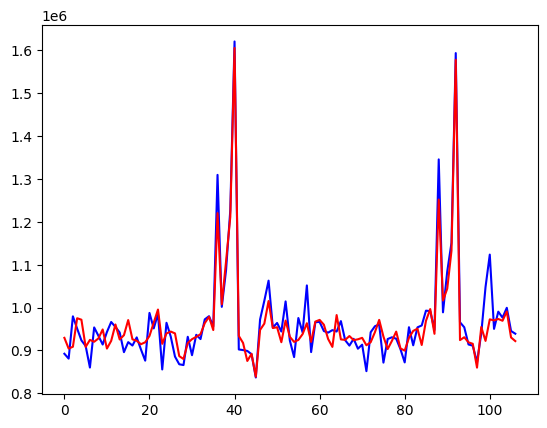

In [361]:
plt.plot(y_train, color='blue')
plt.plot(train_preds, color='red')

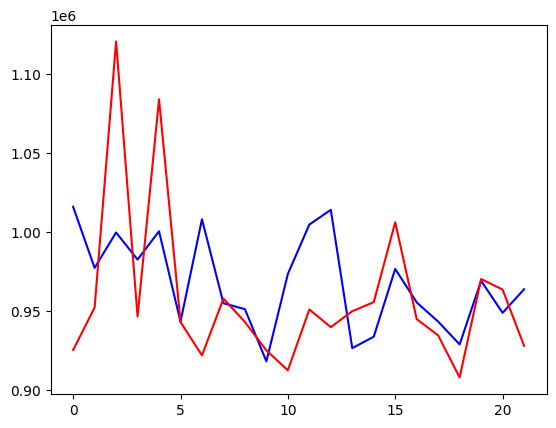

In [362]:
plt.plot(y_test, color='blue')
plt.plot(test_preds, color='red')

In [363]:
print('RMSE: ', math.sqrt(mean_squared_error(y_train, train_preds)))
print('MAPE: ', mean_absolute_percentage_error(y_train, train_preds))
print('R2 score: ', r2_score(y_train, train_preds))

RMSE:  36968.900179860044
MAPE:  0.027534853000780676
R2 score:  0.9029941295824958


In [364]:
print('RMSE: ', math.sqrt(mean_squared_error(y_test, test_preds)))
print('MAPE: ', mean_absolute_percentage_error(y_test, test_preds))
print('R2 score: ', r2_score(y_test, test_preds))

RMSE:  50217.535308308106
MAPE:  0.0375612143250269
R2 score:  -1.9212175102171831


#------------------------------------------------------------------------------------------------------
# FORECASTING FUTURE SALES
#------------------------------------------------------------------------------------------------------

In [505]:
last_batch = test_data[-6:].reshape(1,6)

In [506]:
future_predictions = []

for i in range(12):
    prediction = model.predict(last_batch)
    future_predictions.append(prediction[0,0])
    last_batch = np.append(last_batch[:,1:], prediction, axis=1 )

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


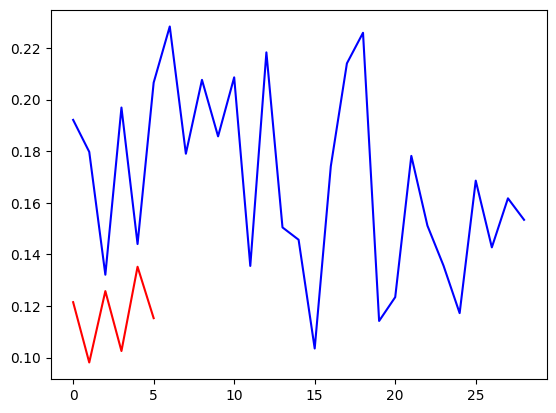

In [513]:
plt.plot(test_data, color='blue')
plt.plot(last_batch.reshape(-1,1), color='red')



In [540]:

import numpy as np

# Set the number of future steps you want to predict
n_future_steps = 24  # For example, predicting the next 12 weeks

# Use the last available data point(s) from the training set for prediction
last_batch = test_data[-6:].reshape(1, 6)  # Reshape as (1, time_steps, features)

# Store predictions
future_predictions = []

for _ in range(n_future_steps):
    # Make prediction
    prediction = model.predict(last_batch)
    
    # Append the prediction to the future predictions list
    future_predictions.append(prediction[0, 0])
    
    # Update the last batch for the next prediction
    last_batch = np.append(last_batch[:, 1:], prediction.reshape(1, 1), axis=1)

# Inverse transform the predictions to get them back to the original scale
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Convert predictions to a simple NumPy array
future_predictions = future_predictions.flatten()  # Flatten to 1D array if needed

# Display the future predictions
print("Future Sales Predictions:", future_predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Future Sales Predictions: [945411.7  991891.   931277.25 959585.94 924295.06 936186.94 9

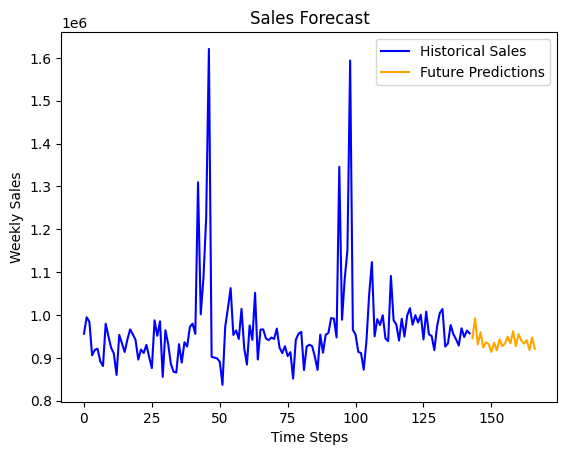

In [541]:
historical_sales = np.array(store['Weekly_Sales']).reshape(-1, 1)
future_predictions = future_predictions.reshape(-1, 1)

# Concatenate historical sales with future predictions
combined_sales = np.vstack((historical_sales, future_predictions))

# Create the x-axis values for the combined data
x_values = np.arange(len(combined_sales))

# Plot the historical sales
plt.plot(x_values[:len(historical_sales)], historical_sales, label='Historical Sales', color='blue')

# Plot the future predictions at the end
plt.plot(x_values[len(historical_sales):], future_predictions, label='Future Predictions', color='orange')

# Add labels and legend
plt.title('Sales Forecast')
plt.xlabel('Time Steps')
plt.ylabel('Weekly Sales')
plt.legend()
plt.show()

In [538]:
x_values[len(historical_sales):],

(array([143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154]),)

In [542]:
from sklearn.ensemble import RandomForestRegressor
rfc = RandomForestRegressor()

In [543]:
store_2, train_data, test_data = make_dataset(df, store_number=2, train_size=0.8, return_train_test=True)
train_data = np.array(train_data).reshape(-1,1)
test_data = np.array(test_data).reshape(-1,1)

scaler = MinMaxScaler(feature_range=(0,1))

train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)


x_train, y_train = preprocess_data(train_data, 6)
x_test, y_test = preprocess_data(test_data,6)



In [544]:
rfc.fit(x_train, y_train)

preds = rfc.predict(x_test)

c:\Users\R.Yeshasvin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [547]:
preds = scaler.inverse_transform(preds.reshape(-1,1))

y_test = scaler.inverse_transform(y_test)

y_train = scaler.inverse_transform(y_train)


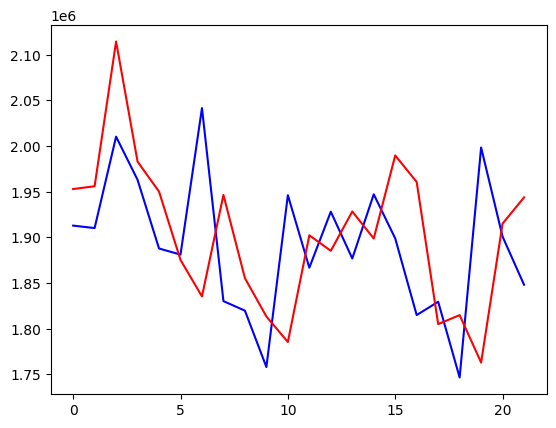

In [552]:
plt.plot(y_test, color='blue')
plt.plot(preds, color='red')


In [553]:
mean_absolute_percentage_error(y_test, preds)

0.04057360330288707